In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import csv
import time
import pandas as pd
import string

from nltk.corpus import stopwords

import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

import re
from collections import Counter
from string import punctuation

from wordcloud import WordCloud

from textblob import TextBlob

In [ ]:
col_names=['date','user','text','likes','retweets']

df = pd.read_csv('/content/drive/MyDrive/QTDL/Report/Sentiment-Analysis-using-Pyspark-on-Multi-Social-Media-Data/modi_data100k.csv', names=col_names)

df.head()

,date,user,text,likes,retweets
0,2019-03-31 04:28:27,Mussara77296944,@mubasherlucman Pritam Das Mukerjee estimated ...,0,0
1,2019-03-31 04:28:27,RealNaqvi,@CNNnews18 @RevathiRajeevan @anuradhasays It’s...,0,0
2,2019-03-31 04:28:27,Suresh05333402,@Tejasvi_Surya @narendramodi is the real joker...,0,0
3,2019-03-31 04:28:20,SaneenJavali,Mega Analysis: 5 years Report Card of #Modi Go...,0,0
4,2019-03-31 04:28:20,kanchandwivedi3,"India takes a giant leap in space, shoots down...",0,0


In [ ]:
# Sort dataframe by date column
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date',ascending=True)
df = df.reset_index().drop('index',axis=1)
df.head()

,date,user,text,likes,retweets
0,2019-03-27 16:00:52,samykalis,@EconomicTimes The @INCIndia and other opposit...,0,0
1,2019-03-27 16:00:54,abhishekfire,Jobs – A Promise Made and Delivered by the Mod...,0,0
2,2019-03-27 16:00:54,aranibanerjee,@Geniustweeet @sanjayuvacha @smritiirani So @s...,0,0
3,2019-03-27 16:00:55,peachyflower,@dhruv_rathee i have been following ur tweets ...,0,0
4,2019-03-27 16:01:00,gscldh,@ShekharGupta The kind of bluff voters have ca...,0,0


In [ ]:
df.shape

(100000, 5)

In [ ]:
df = df.drop_duplicates('text')
df.shape

(94814, 5)

## Data Analysis

In [ ]:
#extract the tweet with more FAVs and more RTs:

fav_max = np.max(df['likes'])
rt_max = np.max(df['retweets'])

fav = df[df.likes == fav_max].index[0]
rt = df[df.retweets == rt_max].index[0]

# Max FAVs:
print("\nThe tweet with more likes is: \n{}".format(df['text'][fav]))
print("Number of likes: {}".format(fav_max))
#print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("\nThe tweet with more retweets is: \n{}".format(df['text'][rt]))
print("Number of retweets: {}".format(rt_max))
#print("{} characters.\n".format(data['len'][rt]))


The tweet with more likes is: 
During 2014 Election, 60 Bollywood Celebs appealed to not Vote for Modi
Some of them were:
Imtiaz
Nandita
Zoya Akhtar
Kabir Khan
Mahesh Bhatt
Aditi Rao

Result: BJP won 282 seats (NDA 336 seats)

Now in 2019, Over 100 filmmakers urge people to not vote for Modi

Guess the result?
Number of likes: 18186

The tweet with more retweets is: 
"UPA 2 was a disgrace as far as the science &amp; tech initiatives in the country was concerned. It is Modi ji who took bold decisions" says Madhavan Nair, Fr head of ISRO, &amp; man behind success of Chandrayaan

Cong shackled our pride - ISRO. Modi ji set it fly! 
#IndiaSpaceSuperPower https://t.co/TJV4UWxDwg
Number of retweets: 6700


In [ ]:
#function to extract hashtags from every tweet
def hashtag_extract(tweets):
    hashtags = []
    # Loop over the words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)

    return hashtags

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
HT_regular = hashtag_extract(df['text'])

# unnesting list
HT_unnested = sum(HT_regular,[])

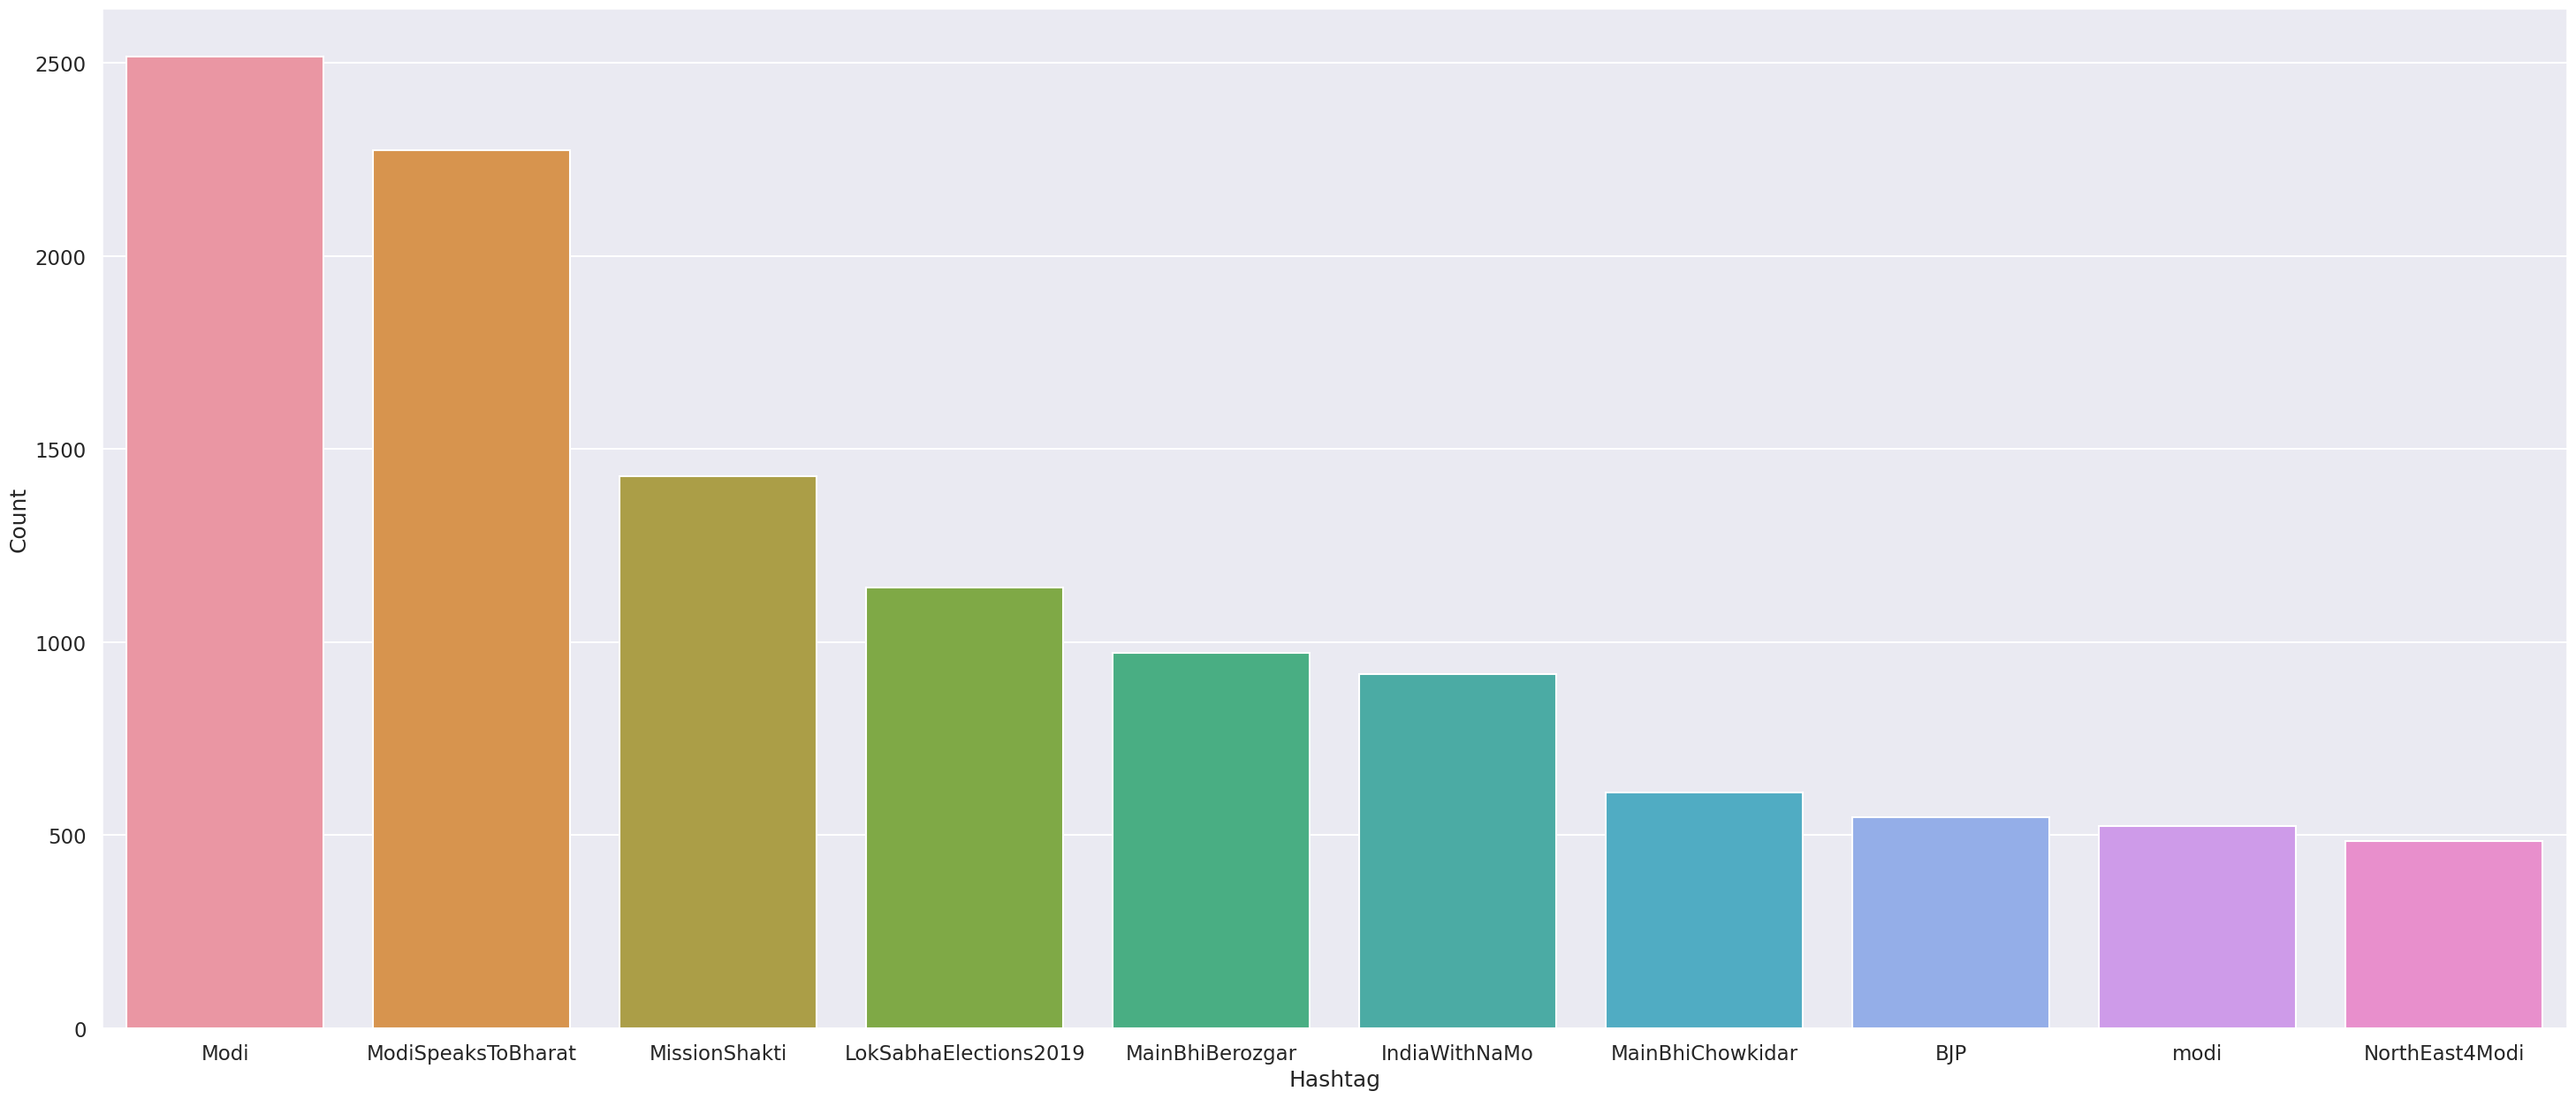

In [ ]:
a = nltk.FreqDist(HT_unnested)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags
d = d.nlargest(columns="Count", n = 10)
plt.figure(figsize=(36,15))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

## Data Cleaning

In [ ]:
# helper function to clean tweets
def processTweet(tweet):
    # Remove HTML special entities (e.g. &amp;)
    tweet = re.sub(r'\&\w*;', '', tweet)
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+','',tweet)
    # Remove tickers
    tweet = re.sub(r'\$\w*', '', tweet)
    # To lowercase
    tweet = tweet.lower()
    # Remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)
    # Remove Punctuation and split 's, 't, 've with a space for filter
    tweet = re.sub(r'[' + punctuation.replace('@', '') + ']+', '', tweet)
    # Remove words with 2 or fewer letters
    tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
    # Remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    # Remove single space remaining at the front of the tweet.
    tweet = tweet.lstrip(' ')
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    tweet = ''.join(c for c in tweet if c <= '\uffff')
    return tweet
#
#df1 = df.loc['0':'5', 'text': ]
df['clean_text'] = df['text'].apply(processTweet)
df.head()

,date,user,text,likes,retweets,clean_text
0,2019-03-27 16:00:52,samykalis,@EconomicTimes The @INCIndia and other opposit...,0,0,the and other opposition party cry for poor pe...
1,2019-03-27 16:00:54,abhishekfire,Jobs – A Promise Made and Delivered by the Mod...,0,0,jobs – promise made and delivered the modi gov...
2,2019-03-27 16:00:54,aranibanerjee,@Geniustweeet @sanjayuvacha @smritiirani So @s...,0,0,freeloader with degree entire political scienc...
3,2019-03-27 16:00:55,peachyflower,@dhruv_rathee i have been following ur tweets ...,0,0,have been following tweets have question not m...
4,2019-03-27 16:01:00,gscldh,@ShekharGupta The kind of bluff voters have ca...,0,0,the kind bluff voters have called modi rural p...


In [ ]:
# drop duplicates
df = df.drop_duplicates('clean_text')
df.shape

(80893, 6)

## Sentiment Categorizing

In [ ]:
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)

    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

df['category'] = df['clean_text'].apply(analyze_sentiment)
df.head()

,date,user,text,likes,retweets,clean_text,category
0,2019-03-27 16:00:52,samykalis,@EconomicTimes The @INCIndia and other opposit...,0,0,the and other opposition party cry for poor pe...,-1
1,2019-03-27 16:00:54,abhishekfire,Jobs – A Promise Made and Delivered by the Mod...,0,0,jobs – promise made and delivered the modi gov...,0
2,2019-03-27 16:00:54,aranibanerjee,@Geniustweeet @sanjayuvacha @smritiirani So @s...,0,0,freeloader with degree entire political scienc...,-1
3,2019-03-27 16:00:55,peachyflower,@dhruv_rathee i have been following ur tweets ...,0,0,have been following tweets have question not m...,1
4,2019-03-27 16:01:00,gscldh,@ShekharGupta The kind of bluff voters have ca...,0,0,the kind bluff voters have called modi rural p...,1


## Visualization of Sentiment

In [ ]:
# check the number of positive vs. negative tagged sentences
positives = df['category'][df.category == 1]
negatives = df['category'][df.category == -1]
neutrals = df['category'][df.category == 0]


print('number of positve categorized text is:  {}'.format(len(positives)))
print('number of negative categorized text is: {}'.format(len(negatives)))
print('number of neutral categorized text is: {}'.format(len(neutrals)))
print('total length of the data is:            {}'.format(df.shape[0]))

number of positve categorized text is:  35745
number of negative categorized text is: 17784
number of neutral categorized text is: 27364
total length of the data is:            80893


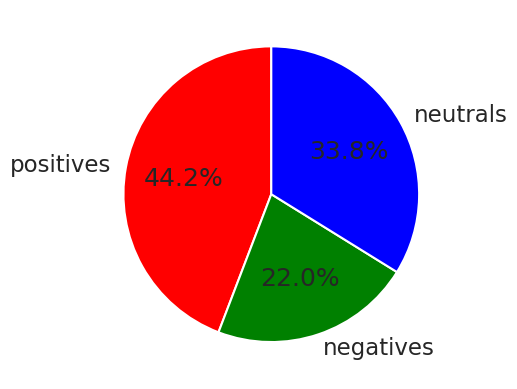

In [ ]:
#import matplotlib.pyplot as plt

slices_len = [len(positives), len(negatives), len(neutrals)]
category = ['positives', 'negatives', 'neutrals']
colors = ['r', 'g', 'b']

plt.pie(slices_len, labels=category, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

## Data Visualization

In [ ]:
# tokenize helper function
import string
def text_process(raw_text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in list(raw_text) if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)

    # Now just remove any stopwords
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords.words('english')]

def remove_words(word_list):
    remove = ['narendra','modi','...','“','”','’','…','modi’']
    return [w for w in word_list if w not in remove]
# -------------------------------------------
# tokenize message column and create a column for tokens
df = df.copy()
df['tokens'] = df['clean_text'].apply(text_process) # tokenize style 1
df['no_modi'] = df['tokens'].apply(remove_words) #tokenize style 2
df = df.drop(['tokens'],axis=1)
df.head()

,date,user,text,likes,retweets,clean_text,category,no_modi
0,2019-03-27 16:00:52,samykalis,@EconomicTimes The @INCIndia and other opposit...,0,0,the and other opposition party cry for poor pe...,-1,"[opposition, party, cry, poor, people, small, ..."
1,2019-03-27 16:00:54,abhishekfire,Jobs – A Promise Made and Delivered by the Mod...,0,0,jobs – promise made and delivered the modi gov...,0,"[jobs, –, promise, made, delivered, government..."
2,2019-03-27 16:00:54,aranibanerjee,@Geniustweeet @sanjayuvacha @smritiirani So @s...,0,0,freeloader with degree entire political scienc...,-1,"[freeloader, degree, entire, political, scienc..."
3,2019-03-27 16:00:55,peachyflower,@dhruv_rathee i have been following ur tweets ...,0,0,have been following tweets have question not m...,1,"[following, tweets, question, think, fit, repl..."
4,2019-03-27 16:01:00,gscldh,@ShekharGupta The kind of bluff voters have ca...,0,0,the kind bluff voters have called modi rural p...,1,"[kind, bluff, voters, called, rural, punjab, e..."


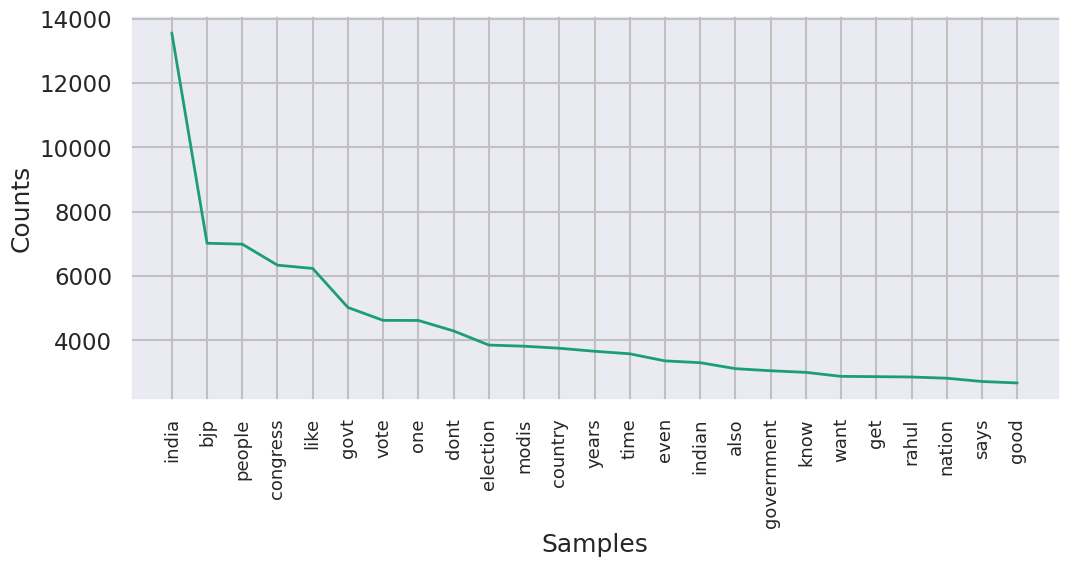

Text(0.5, 0, 'Word Rank')

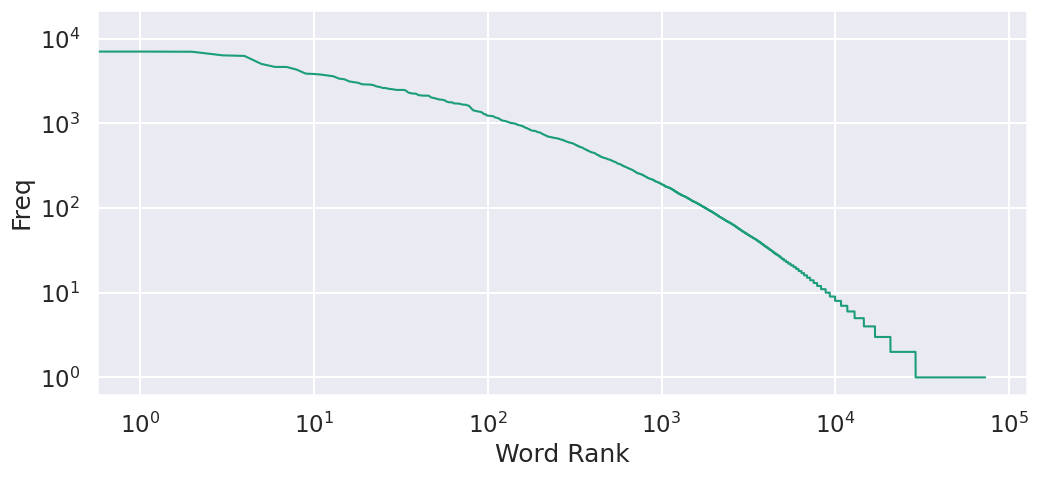

In [ ]:
# plot word frequency distribution of first few words without narendra, modi
# no_modi
no_modi = []
for ls in df['no_modi']:
    words = [w for w in ls]
    for word in words:
        no_modi.append(word)
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(no_modi)
fd.plot(25,cumulative=False)

# log-log  of all words -- no_modi
word_counts = sorted(Counter(no_modi).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

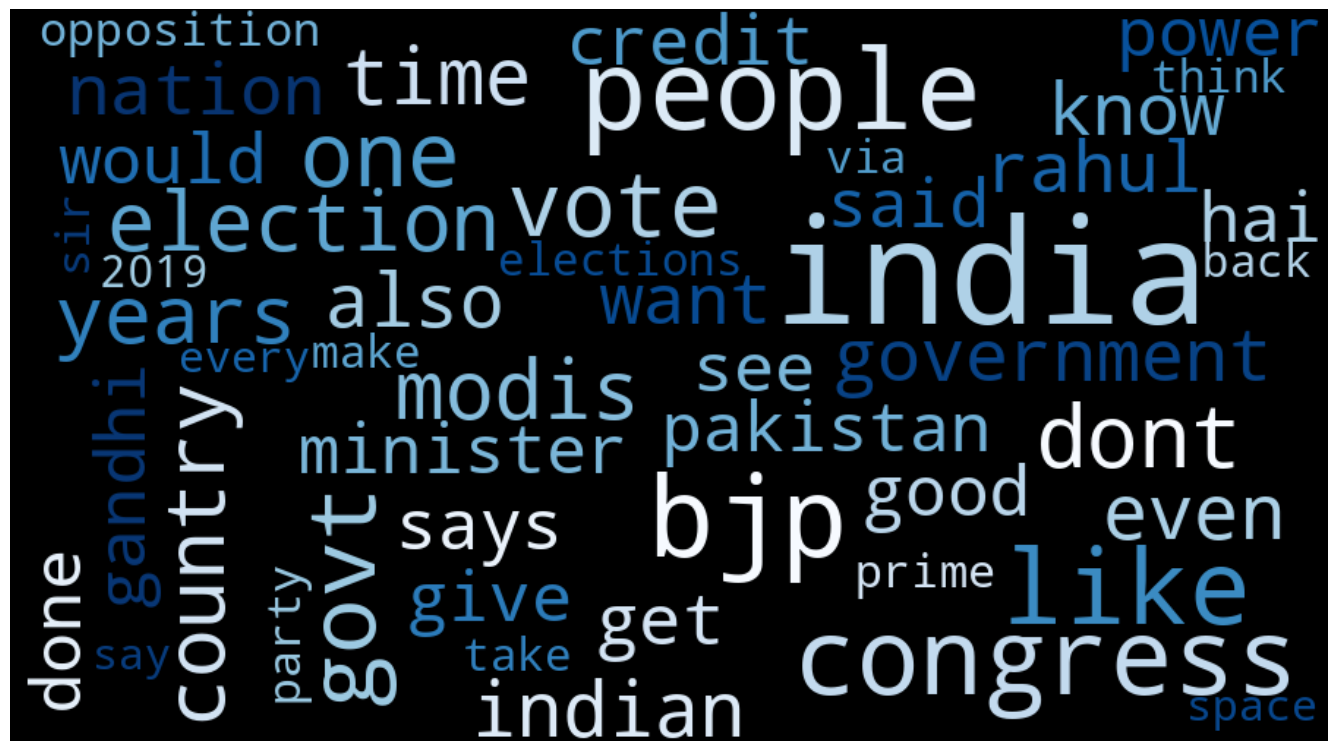

In [ ]:
# split sentences to get individual words
all_words = []

for line in df['no_modi']: # try 'tokens'
    all_words.extend(line)

# create a word frequency dictionary
wordfreq = Counter(all_words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=50,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

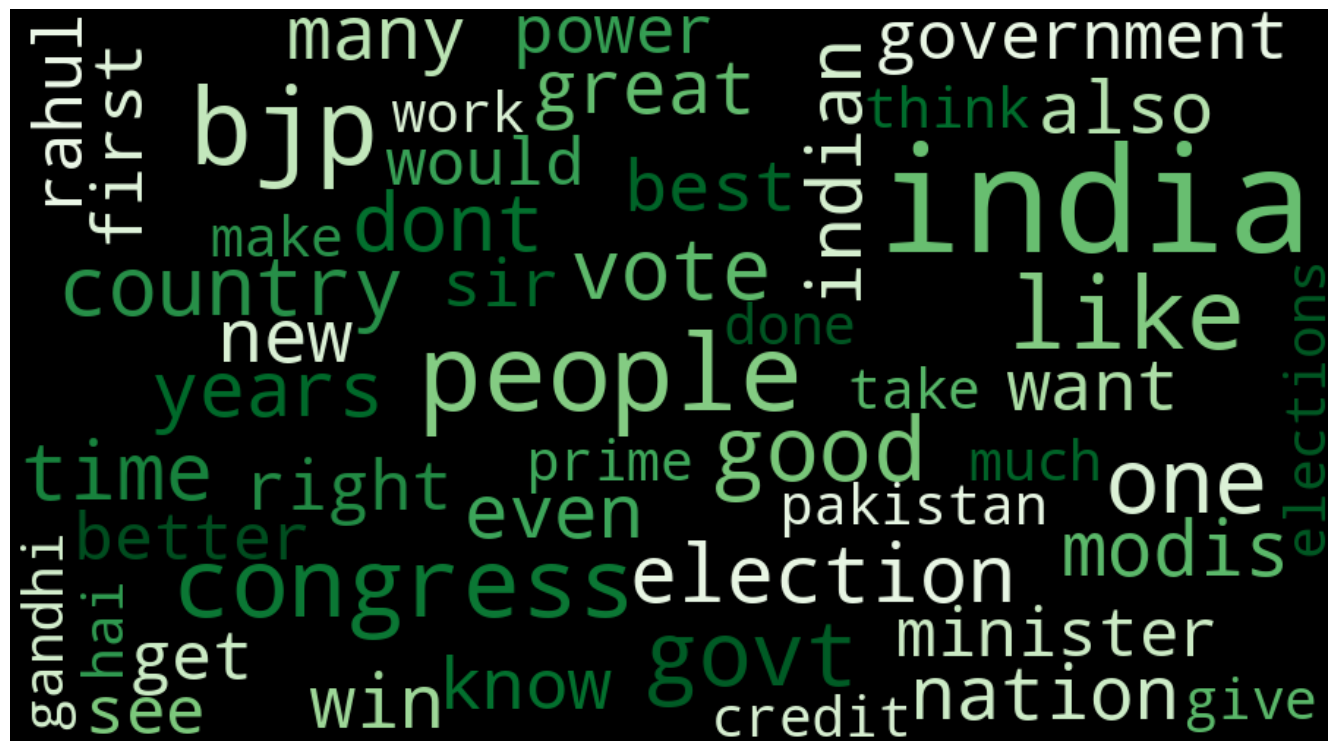

In [ ]:
# split sentences to get individual words
all_pos_words = []
df_modi_pos = df[df.category==1]
for line in df_modi_pos['no_modi']: # try 'tokens'
    all_pos_words.extend(line)

# create a word frequency dictionary
wordfreq = Counter(all_pos_words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=50,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Greens',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

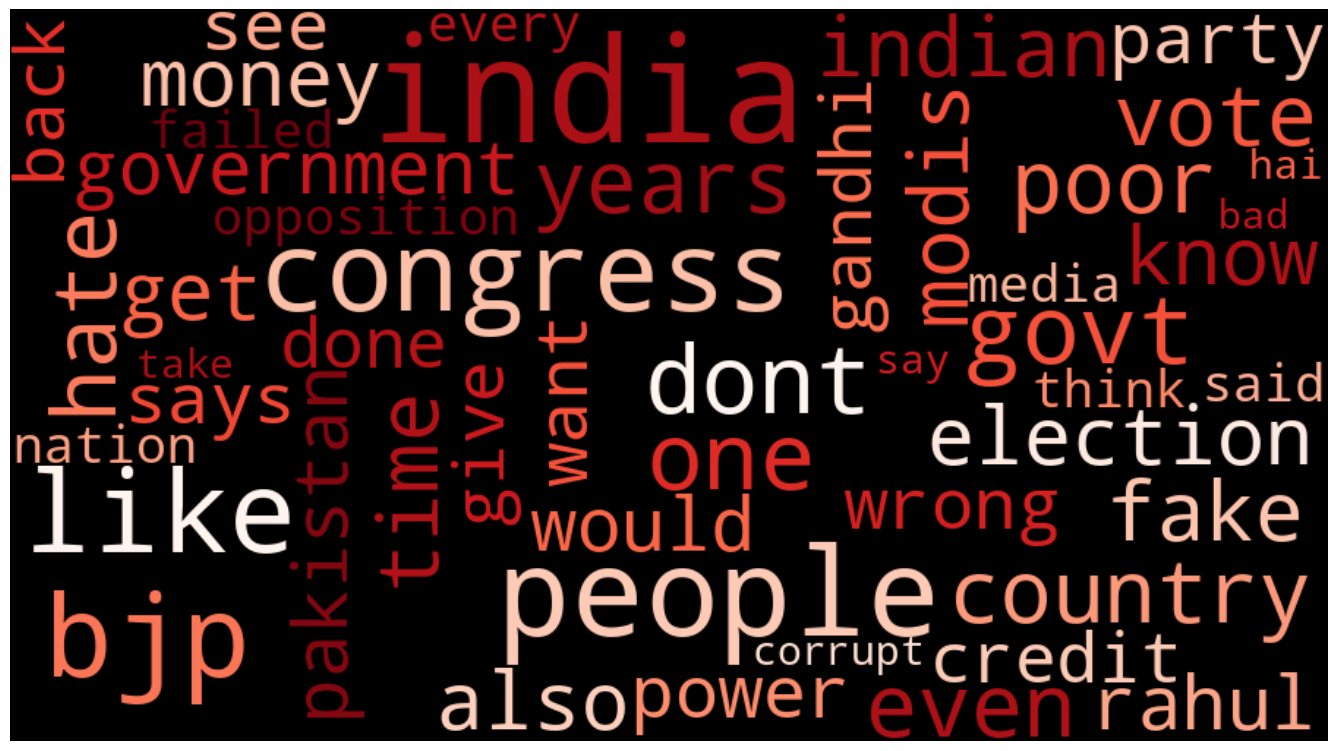

In [ ]:
# split sentences to get individual words
all_neg_words = []
df_modi_neg = df[df.category==-1]
#df_modi_neg.head()
for line in df_modi_neg['no_modi']: # try 'tokens'
    all_neg_words.extend(line)

# create a word frequency dictionary
wordfreq = Counter(all_neg_words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=50,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Reds',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Cleaned data

In [ ]:
dataset = df.filter(['clean_text','category'], axis=1)
dataset.shape

(80893, 2)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80893 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   clean_text  80893 non-null  object
 1   category    80893 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.9+ MB


In [ ]:
dataset.to_csv('dataset.csv', index = False, sep=",", encoding="utf-8")